In [1]:
import numpy as np
from numf_func import get_neighbors
from mega import numf, create_Up
import matplotlib.pyplot as plt

In [2]:
def gauss(x, sigma=1, mean=0, scale=1):
    return scale * np.exp(-np.square(x - mean) / (2 * sigma ** 2))

m = 50
r = 3
p1 = 12
p2 = 25
p3 = 38

x = np.linspace(1, m, m).reshape(-1, 1)
w1 = gauss(x, sigma=2, mean=p1)
w2 = np.concatenate((np.zeros((int((m-25)/2), 1)), np.ones((p2, 1)), np.zeros((int((m-25)/2)+1, 1))))
w3 = gauss(x, sigma=2, mean=p3)
Wtrue = np.hstack((w1, w2, w3))


n = 6
c = 1/np.sqrt(r-1)
e = 0.001
Htrue = np.array([[c + e, 1-c-e, 0],
                  [1-c-e, c+e, 0],
                  [c+e, 0, 1-c-e],
                  [1-c-e, 0, c+e],
                  [0, c+e, 1-c-e],
                  [0, 1-c-e, c+e]]).T

M = Wtrue @ Htrue

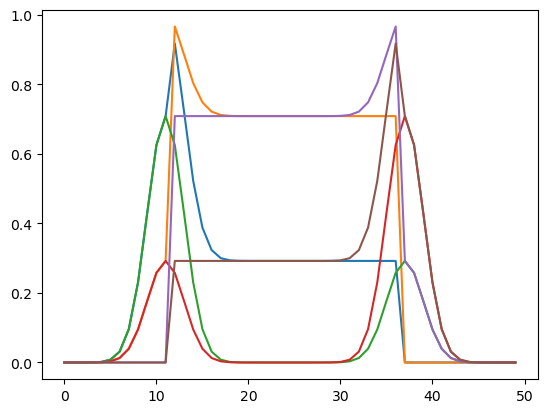

In [3]:
plt.plot(M)

In [4]:
W0 = np.random.rand(m, r)
H0 = np.random.rand(r, n)

In [5]:
pvals = get_neighbors([p1, p2, p3], m, 1)
pvals

[37, 38, 39, 11, 12, 13, 24, 25, 26]

In [6]:
(W, H) = numf(M, W0, H0, pvals, l2=0.2, iters=5)

0 0.7808520082185535
1 0.5948034098547021
2 0.4399994367285686
3 0.38450647643354957
4 0.3343408936673398


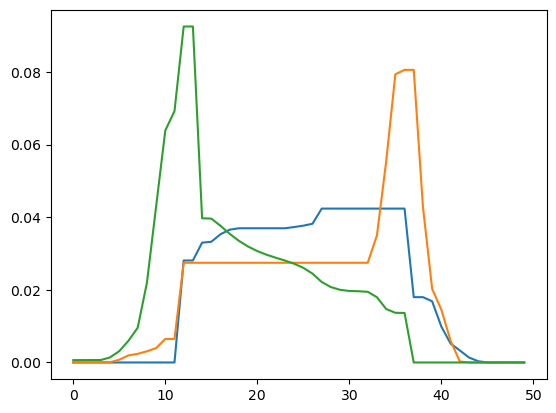

In [7]:
plt.plot(W)